In [4]:
from plotly.offline import init_notebook_mode, iplot
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.plotly as py
from plotly import tools
import random 
import warnings
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

In [5]:
train_df = pd.read_csv('data/train.csv')

In [6]:
parent_category_name_map = {"Личные вещи" : "Personal belongings",
                            "Для дома и дачи" : "For the home and garden",
                            "Бытовая электроника" : "Consumer electronics",
                            "Недвижимость" : "Real estate",
                            "Хобби и отдых" : "Hobbies & leisure",
                            "Транспорт" : "Transport",
                            "Услуги" : "Services",
                            "Животные" : "Animals",
                            "Для бизнеса" : "For business"}

region_map = {"Свердловская область" : "Sverdlovsk oblast",
            "Самарская область" : "Samara oblast",
            "Ростовская область" : "Rostov oblast",
            "Татарстан" : "Tatarstan",
            "Волгоградская область" : "Volgograd oblast",
            "Нижегородская область" : "Nizhny Novgorod oblast",
            "Пермский край" : "Perm Krai",
            "Оренбургская область" : "Orenburg oblast",
            "Ханты-Мансийский АО" : "Khanty-Mansi Autonomous Okrug",
            "Тюменская область" : "Tyumen oblast",
            "Башкортостан" : "Bashkortostan",
            "Краснодарский край" : "Krasnodar Krai",
            "Новосибирская область" : "Novosibirsk oblast",
            "Омская область" : "Omsk oblast",
            "Белгородская область" : "Belgorod oblast",
            "Челябинская область" : "Chelyabinsk oblast",
            "Воронежская область" : "Voronezh oblast",
            "Кемеровская область" : "Kemerovo oblast",
            "Саратовская область" : "Saratov oblast",
            "Владимирская область" : "Vladimir oblast",
            "Калининградская область" : "Kaliningrad oblast",
            "Красноярский край" : "Krasnoyarsk Krai",
            "Ярославская область" : "Yaroslavl oblast",
            "Удмуртия" : "Udmurtia",
            "Алтайский край" : "Altai Krai",
            "Иркутская область" : "Irkutsk oblast",
            "Ставропольский край" : "Stavropol Krai",
            "Тульская область" : "Tula oblast"}


category_map = {"Одежда, обувь, аксессуары":"Clothing, shoes, accessories",
"Детская одежда и обувь":"Children's clothing and shoes",
"Товары для детей и игрушки":"Children's products and toys",
"Квартиры":"Apartments",
"Телефоны":"Phones",
"Мебель и интерьер":"Furniture and interior",
"Предложение услуг":"Offer services",
"Автомобили":"Cars",
"Ремонт и строительство":"Repair and construction",
"Бытовая техника":"Appliances",
"Товары для компьютера":"Products for computer",
"Дома, дачи, коттеджи":"Houses, villas, cottages",
"Красота и здоровье":"Health and beauty",
"Аудио и видео":"Audio and video",
"Спорт и отдых":"Sports and recreation",
"Коллекционирование":"Collecting",
"Оборудование для бизнеса":"Equipment for business",
"Земельные участки":"Land",
"Часы и украшения":"Watches and jewelry",
"Книги и журналы":"Books and magazines",
"Собаки":"Dogs",
"Игры, приставки и программы":"Games, consoles and software",
"Другие животные":"Other animals",
"Велосипеды":"Bikes",
"Ноутбуки":"Laptops",
"Кошки":"Cats",
"Грузовики и спецтехника":"Trucks and buses",
"Посуда и товары для кухни":"Tableware and goods for kitchen",
"Растения":"Plants",
"Планшеты и электронные книги":"Tablets and e-books",
"Товары для животных":"Pet products",
"Комнаты":"Room",
"Фототехника":"Photo",
"Коммерческая недвижимость":"Commercial property",
"Гаражи и машиноместа":"Garages and Parking spaces",
"Музыкальные инструменты":"Musical instruments",
"Оргтехника и расходники":"Office equipment and consumables",
"Птицы":"Birds",
"Продукты питания":"Food",
"Мотоциклы и мототехника":"Motorcycles and bikes",
"Настольные компьютеры":"Desktop computers",
"Аквариум":"Aquarium",
"Охота и рыбалка":"Hunting and fishing",
"Билеты и путешествия":"Tickets and travel",
"Водный транспорт":"Water transport",
"Готовый бизнес":"Ready business",
"Недвижимость за рубежом":"Property abroad"}


In [7]:
train_df['region_en'] = train_df['region'].apply(lambda x : region_map[x])
train_df['parent_category_name_en'] = train_df['parent_category_name'].apply(lambda x : parent_category_name_map[x])
train_df['category_name_en'] = train_df['category_name'].apply(lambda x : category_map[x])

In [8]:
# Log price
train_df['price_log'] = np.log(train_df['price'] + 1)

In [9]:
#  Use this to make it a subset
train_df = train_df[:10000]

In [10]:
# Calculate category mean and std (thanks Alireza)
price_category_mean = train_df[['price', 'category_name']].groupby('category_name').mean().reset_index()
price_category_std = train_df[['price', 'category_name']].groupby('category_name').std().reset_index()

In [11]:
# initialise Category mean price, Category std and normalized price
train_df['cat_price'] = np.nan
train_df['cat_std'] = np.nan
train_df['norm_price'] = np.nan

# assign category price mean and std values to each item
for x in range (0,len(train_df)-1):
    train_df.cat_price[x] =  price_category_mean.price [ price_category_mean.category_name == train_df.category_name[x] ]
    train_df.cat_std[x] =  price_category_std.price [ price_category_std.category_name == train_df.category_name[x] ] 

# Calculate normalized price
train_df['norm_price'] =  (train_df['price'] - train_df['cat_price'] ) / train_df['cat_std'] 

In [12]:
# Log norm price

# Calculate category mean and std (thanks Alireza)
price_category_mean_log = train_df[['price_log', 'category_name']].groupby('category_name').mean().reset_index()
price_category_std_log = train_df[['price_log', 'category_name']].groupby('category_name').std().reset_index()

In [13]:
# initialise Category mean price, Category std and normalized price
train_df['cat_price_log'] = np.nan
train_df['cat_std_log'] = np.nan
train_df['norm_price_log'] = np.nan

# assign category price mean and std values to each item
for x in range (0,len(train_df)-1):
    train_df.cat_price_log[x] =  price_category_mean_log.price_log [ price_category_mean_log.category_name == train_df.category_name[x] ]
    train_df.cat_std_log[x] =  price_category_std_log.price_log [ price_category_std_log.category_name == train_df.category_name[x] ] 

# Calculate normalized price
train_df['norm_price_log'] =  (train_df['price_log'] - train_df['cat_price_log'] ) / train_df['cat_std_log'] 

KeyboardInterrupt: 

In [ ]:
train_df.head()

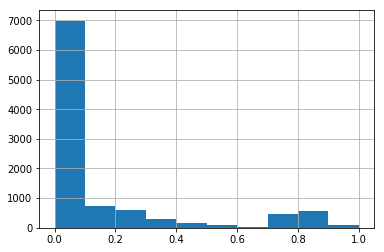

In [15]:
train_df.deal_probability.hist()

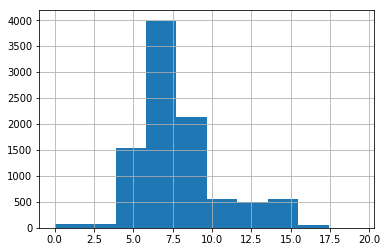

In [17]:
train_df.price_log.hist()

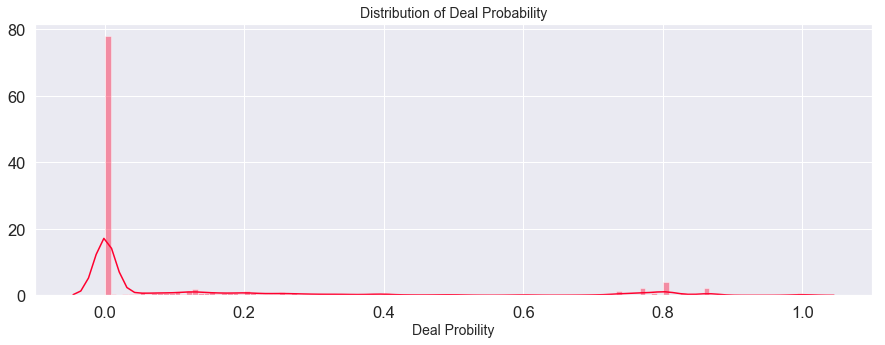

In [21]:
## 1. Deal Probability Distribution
def generate_histogram_plot(df, col, title):
    trace = go.Histogram(x = df[col]) 
    layout = go.Layout(title=title, legend=dict(orientation="h"), height=400)
    fig = go.Figure(data=[trace], layout=layout)
    iplot(fig)

# generate_histogram_plot(train_df, 'deal_probability', 'Distribution of Deal Probability')
plt.figure(figsize=(15,5))
sns.distplot(train_df["deal_probability"].values, bins=120, color="#ff002e")
plt.xlabel('Deal Probility', fontsize=14);
plt.title("Distribution of Deal Probability", fontsize=14);
plt.show();

In [3]:
# generate_histogram_plot(train_df, 'deal_probability', 'Distribution of Deal Probability')
plt.figure(figsize=(15,5))
sns.distplot(train_df["price"].values, bins=100, color="#ff002e")
plt.xlabel('Deal Probility', fontsize=14);
plt.title("Distribution of Deal Probability", fontsize=14);
plt.show();

NameError: name 'plt' is not defined

In [ ]:
# I would like to be able to plot this with the outlier excluded
plt.plot('price', 'deal_probability', data=train_df, linestyle='', marker='o', markersize=0.9)
plt.xlabel('Price')
plt.ylabel('Deal Probability')
plt.title('Price vs Deal Probability', loc='left');

In [ ]:
sns.regplot('norm_price', 'deal_probability', data=train_df,fit_reg=False, marker='o');

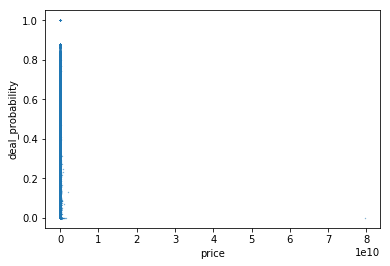

In [8]:
sns.regplot('price', 'deal_probability', data=train_df,fit_reg=False, marker='o',scatter_kws={"s": 0.1});

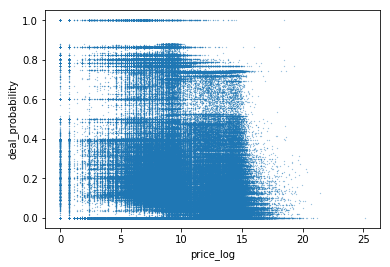

In [9]:
sns.regplot('price_log', 'deal_probability', data=train_df,fit_reg=False, marker='o',scatter_kws={"s": 0.05});

In [ ]:
sns.regplot('norm_price_log', 'deal_probability', data=train_df, marker='o',scatter_kws={"s": 1});
plt.xlabel('Price')
plt.ylabel('Deal Probability')
plt.title('Price vs Deal Probability', loc='left');

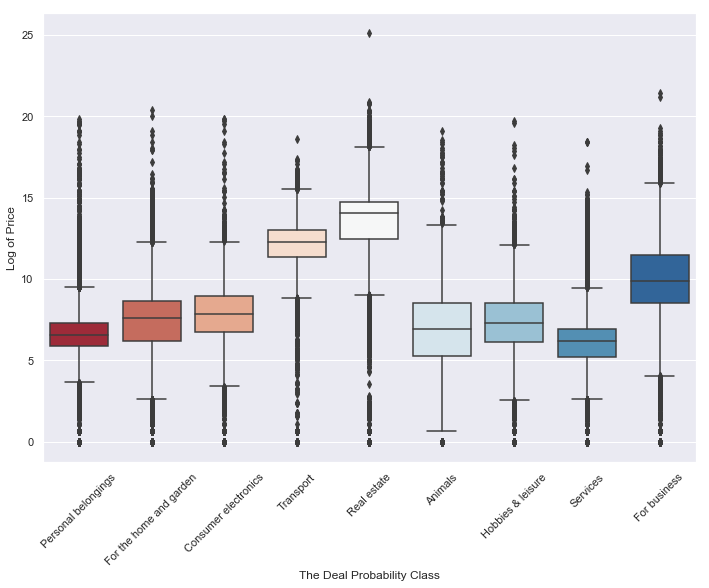

In [10]:
#  Category price box plots
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.boxplot(x='parent_category_name_en', y='price_log', data=train_df, palette="RdBu")
g.set_xlabel('The Deal Probability Class',fontsize=12)
plt.xticks(rotation=45)
g.set_ylabel('Log of Price',fontsize=12)
plt.show()

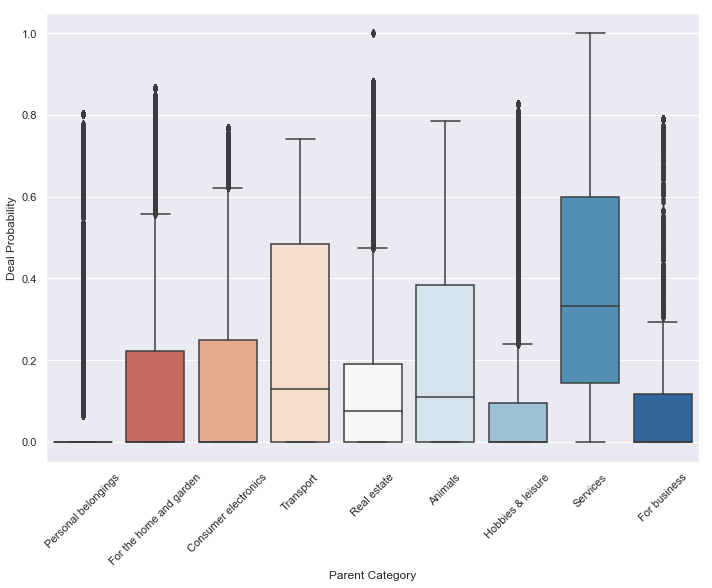

In [11]:
#  Category deal probability box plots
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.boxplot(x='parent_category_name_en', y='deal_probability', data=train_df, palette="RdBu")
g.set_xlabel('Parent Category',fontsize=12)
plt.xticks(rotation=45)
g.set_ylabel('Deal Probability',fontsize=12)
plt.show()

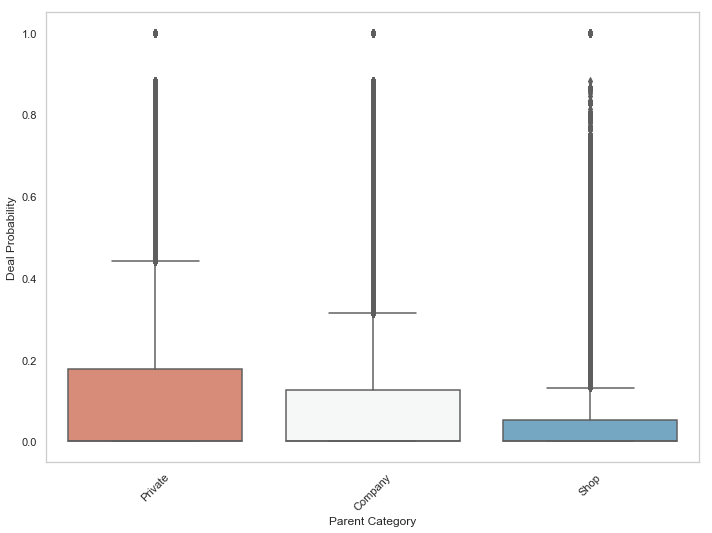

In [12]:
#  Category deal probability box plots
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid", {'axes.grid' : False})
g = sns.boxplot(x='user_type', y='deal_probability', data=train_df, palette="RdBu")
g.set_xlabel('Parent Category',fontsize=12)
plt.xticks(rotation=45)
g.set_ylabel('Deal Probability',fontsize=12)
plt.show()

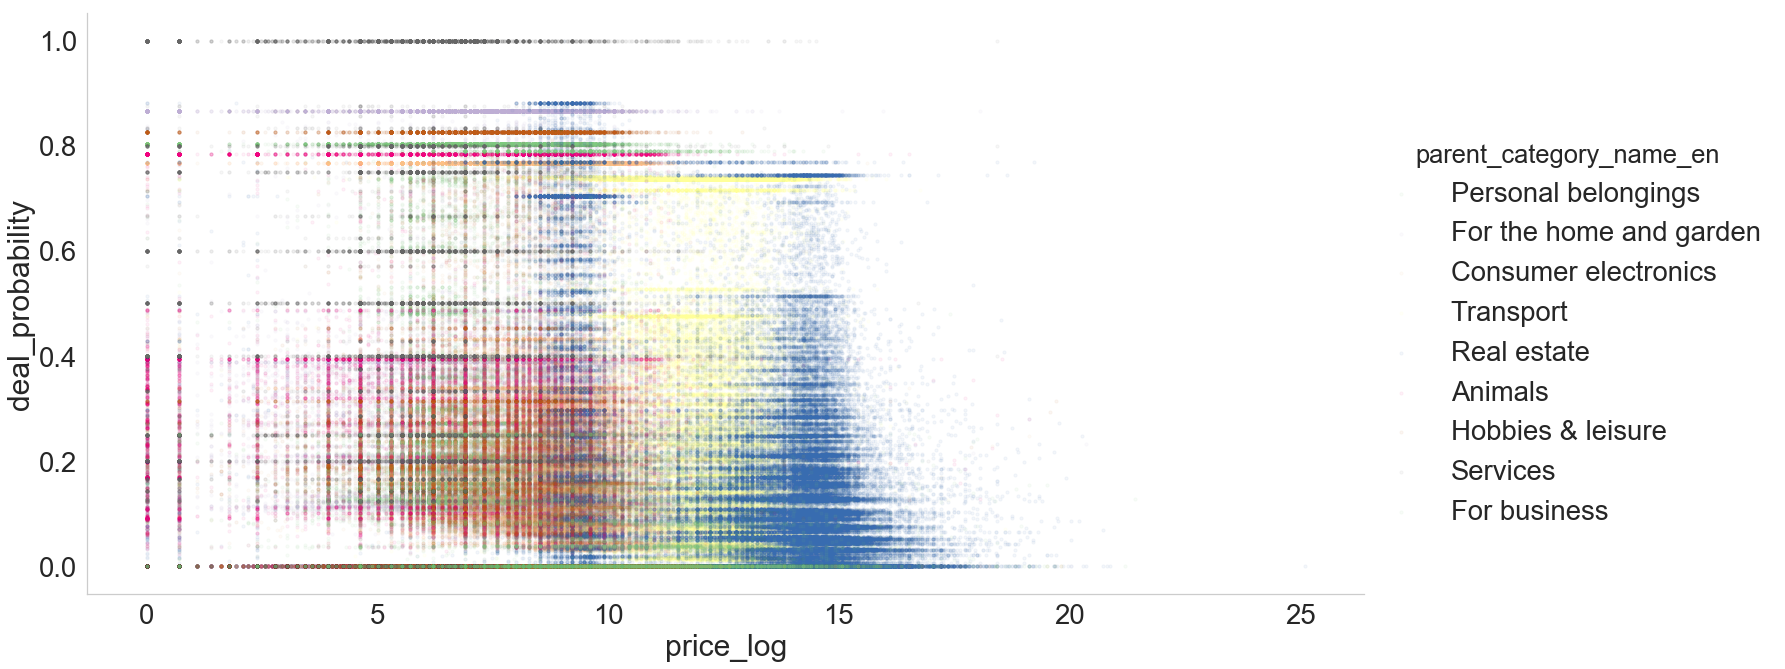

In [13]:
sns.set(font_scale=2.5)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.lmplot( 'price_log', 'deal_probability', data=train_df, fit_reg=False,  height=10, aspect=2, hue='parent_category_name_en', 
           legend=True, palette="Accent", scatter_kws={"alpha":0.05,"s":10} );

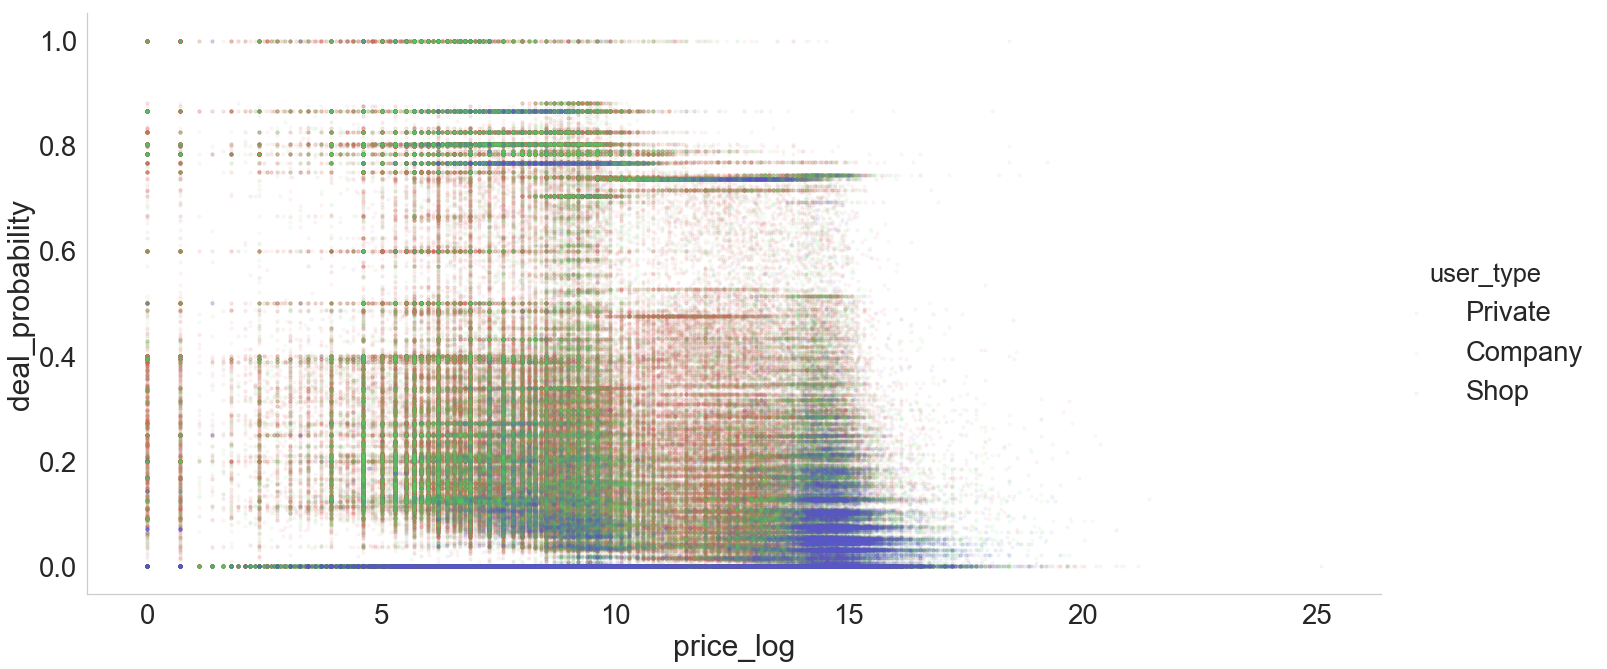

In [14]:
sns.set(font_scale=2.5)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.lmplot( 'price_log', 'deal_probability', data=train_df, fit_reg=False, height=10, aspect=2, hue='user_type', 
           legend=True, palette="hls", scatter_kws={"alpha":0.05,"s":10} );

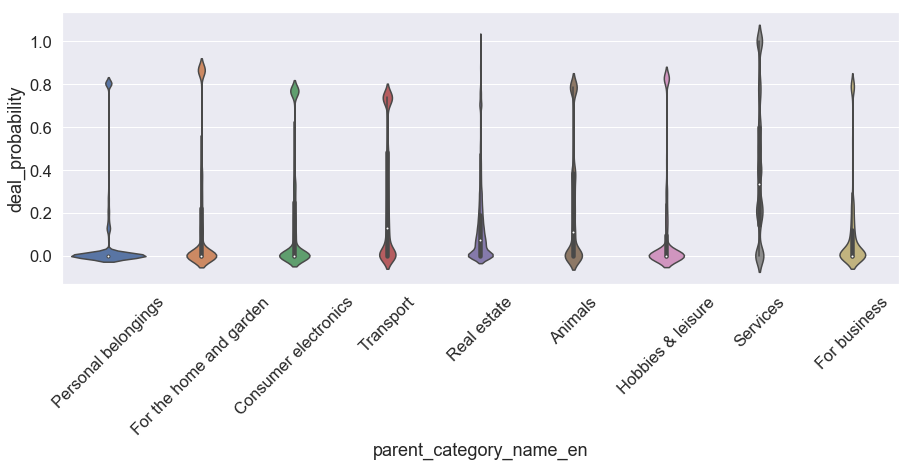

In [15]:
sns.set(font_scale=1.5)
sns.set({'figure.figsize':(15,5)});
ax = sns.violinplot(x='parent_category_name_en', y='deal_probability', data=train_df);
plt.xticks(rotation=45);

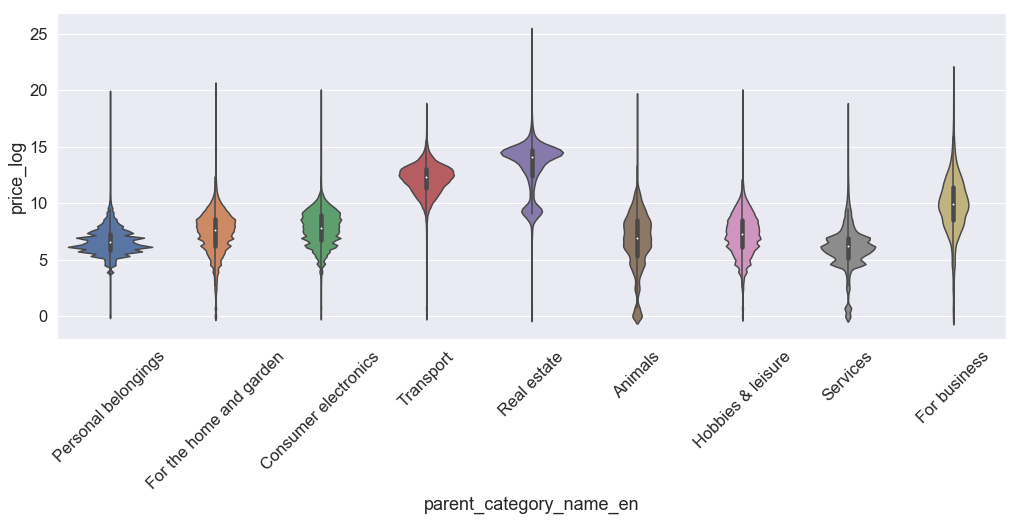

In [16]:
sns.set(font_scale=1.5)
sns.set({'figure.figsize':(17,6)});
ax = sns.violinplot(x='parent_category_name_en', y='price_log', data=train_df);
plt.xticks(rotation=45);

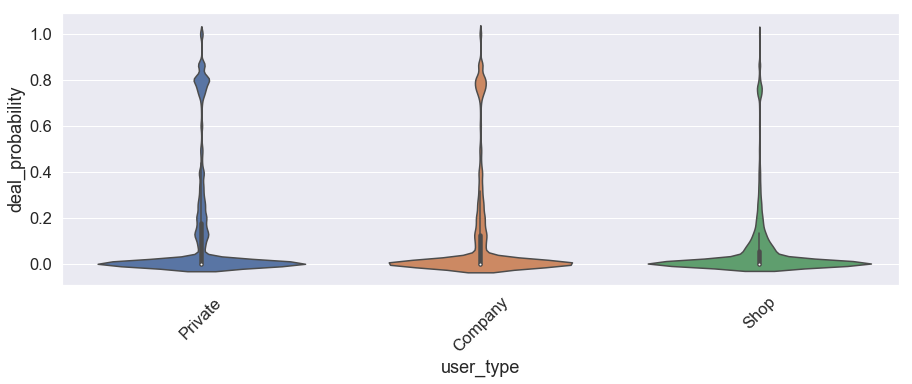

In [17]:
sns.set(font_scale=1.5)
sns.set({'figure.figsize':(15,5)});
ax = sns.violinplot(x='user_type', y='deal_probability', data=train_df);
plt.xticks(rotation=45);

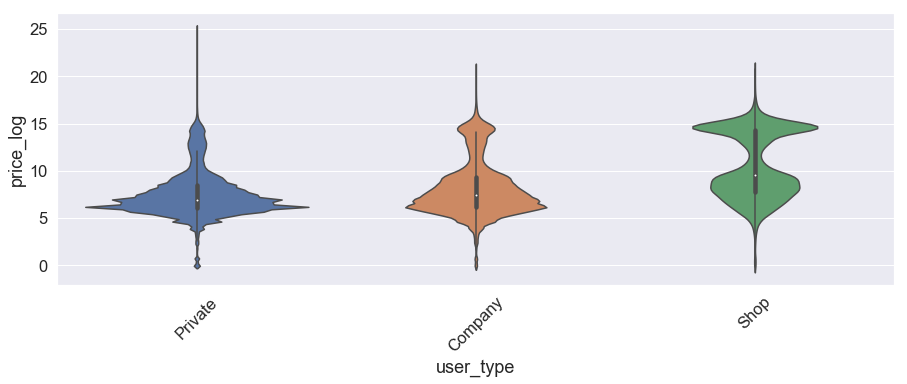

In [19]:
sns.set(font_scale=1.5)
sns.set({'figure.figsize':(15,5)});
ax = sns.violinplot(x='user_type', y='price_log', data=train_df);
plt.xticks(rotation=45);